<a href="https://colab.research.google.com/github/aulia-adil/craiglist-sales/blob/dewa/Proyek_Akhir_KASDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rumusan masalah

1. **Dataset Craiglist Sales (DCS) ini apa sih?** 

  DCS adalah dataset terkait mobil second yang dijual oleh Perusahaan Craiglist. Tentunya dataset tersebut juga disertai dengan data-data relevan terkait penjualan mobil second tersebut.

1. **(Optional) Mengapa DCS dibuat?**
1. **(Optional) Bagaimana DCS dibuat?**
1. **(Optional) Apakah DCS akurat?**
1. **Apa karakteristik DCS?**
1. **Apa definisi dari setiap atribut DCS?**

  Ada di section [Deskripsi Dataset](#deskripsi-dataset)

1. **Masalah-masalah apa saja yang dimiliki DCS?**

  Ada di section [Identifikasi Masalah Dataset](#identifikasi-masalah-dataset)

1. **Mengapa masalah-masalah tersebut muncul?**
1. **Apa solusi dari setiap masalah yang dimiliki DCS?**
1. **Apakah ada independent variable dari DCS? Jika iya apa saja?**
1. **Apakah ada dependent variable dari DCS? Jika iya apa saja dan bagaimana korelasi hubungannya?**
1. **Bagaimana cara visualisasi dari setiap atribut yang ada pada DCS?**
1. **Apa makna dari setiap distribusi yang dimiliki atribut-atribut DCS? Apakah ada anomali di dalamnya?**
1. **(Optional) Apakah DCS dapat dikaitkan dengan dataset lain?**
1. **Apa yang bisa kita dapatkan dari DCS ini?**

## Import Module dan Dataset

In [ ]:
# Library Adil nanti dibersihin aja
# import library
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.api as sm
import sys
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.api as sm
import sklearn.manifold as smn
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, RobustScaler
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Import library
import matplotlib.pyplot as plt
import scipy.stats as scp
import plotly.express as px
import statsmodels.api as sm
import sklearn.manifold as smn
import seaborn as sns
import pandas as pd
import numpy as np

import os
import sys
import math

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
def download_from_gdrive(file_id):
  downloaded = drive.CreateFile({'id':file_id})
  downloaded.FetchMetadata(fetch_all=True)
  downloaded.GetContentFile(downloaded.metadata['title'])

In [ ]:
# Import cell
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Colab harus menggunakan akun UI untuk bisa mendownload file ini
download_from_gdrive('1BpEsEOQyd9F7m4TC7oGfu6e0wKtHV7gj')

In [ ]:
!unzip -o 'archive.zip'

Archive:  archive.zip
replace vehicles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: vehicles.csv            


In [ ]:
# Read dataset
data = pd.read_csv("vehicles.csv")

In [ ]:
data.head(10)

print(data.lat.unique())

[      nan 32.59     32.592    ... 44.3252   40.745625 43.64293 ]


## Exploratory Data Analysis dan Preprocessing Raw Data

<a name="deskripsi-dataset"></a>
#### Deskripsi Dataset

- Terdapat 26 atribut pada dataset ini:
  * `id` : Identifier unique untuk setiap iklan
  * `url` : Link menuju halaman web iklan 
  * `region` : Daerah asal tempat mobil yang dijual atau tempat iklan di pasang
  * `region_url` : Link menuju website craigslist sesuai region tempat mobil di jual atau tempat iklan di pasang
  * `price` : Harga mobil
  * `year` : Tahun pembuatan mobil
  * `manufacturer` : Perusahaan pembuat mobil
  * `model` : Model dari mobil yang dijual (mis: sierra 1500 crew cab slt)
  * `condition`: Penjelasan kondisi mobil (opsi: good, excellent, fair, like new, new, salvage)
  * `cylinders`: Jumlah silinder pada mesin mobil (opsi: 10 cylinders, 12 cylinders, 8 cylinders, 6 cylinders, 5 cylinders, 4 cylinders, 3 cylinders, other)
  * `fuel` : Jenis bahan bakar yang digunakan mobil (opsi: gas, diesel, hybrid, electric, other)
  * `odometer` : Jumlah jarak yang sudah ditempuh mobil dalam satuan mil
  * `title_status` : Status dari mobil yang dijual (opsi: clean, rebuilt, lien, salvage, missing, parts only)
  * `transmission` : Jenis transmisi yang digunakan mobil (opsi: automatic, manual, other
  * `VIN` : Plat nomor mobil
  * `drive` : Jumlah/jenis penggerak yang digunakan mobil (opsi: 4wd, rwd, fwd) 
  * `size` : Ukuran mobil yang dijual
  * `type` : Tipe mobil yang dijual (opsi: SUV, hatchback, mini-van, coupe sedan, offroad, bus, van, convertible, wagon, truck, pickup, other)
  * `paint_color` : Warna cat mobil (opsi: white, blue, red, black, silver, grey, brown, yellow, orange, green, purple, custom)
  * `image_url` : Link menuju gambar mobil
  * `description` : Deskripsi mobil
  * `county` : County tempat mobil di jual atau iklan di pasang
  * `state` : State tempat mobil di jual atau iklan di pasang
  * `lat` : Koordinat latitude lokasi mobil di jual
  * `long` : Koordinat longitude lokasi mobil di jual
  * `posting_date` : Tanggal iklan dipasang
- Keseluruhan dataset memiliki 446.880 baris.


#### Pertanyaan EDA Raw:

1. Apakah setiap atribut numerik bertipe numerik?
1. Apakah setiap atribut kategorik bertipe kategorik?
1. Berapa banyak persentase missing values setiap atribut?
1. Apakah ada row duplikat?
1. Apakah ada outlier?

In [ ]:
#@title Fungsi

def clean_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  result = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
  return result

def numeric_cleaning_fillna_mean(df):
  df_res = df.select_dtypes(include=[np.number])
  columns = df_res.columns
  for column in columns:
    mean = df_res[column].mean()
    df[column].fillna(value=mean, inplace=True)

def categoric_cleaning_fillna_mode(df):
  df_res = df.select_dtypes(exclude=[np.number])
  columns = df_res.columns
  for column in columns:
    mode = df_res[column].describe()["top"]
    df[column].fillna(value=mode, inplace=True)

def see_dataset_dimension(data):
  print("Dimension")
  print("Row:", data.shape[0])
  print("Column:", data.shape[1])

def see_numerical_attribute(data):
  num_attr = data.select_dtypes(include=[np.number])
  print("Numerical Attribute")
  i = 1
  for column in num_attr.columns:
    print(str(i) + ".", column)
    i += 1

def see_categorical_attribute(data):
  cat_attr = data.select_dtypes(exclude=[np.number])
  print("Categorical Attribute")
  i = 1
  for column in cat_attr.columns:
    print(str(i) + ".", column)
    i += 1

def count_outlier_column(data, column):
  q1 = data.quantile(q=0.25)[column]
  q3 = data.quantile(q=0.75)[column]
  iqr = q3-q1
  upper_bound = q3 + iqr * 1.5
  lower_bound = q1 - iqr * 1.5
  upper_outliers = data.loc[data[column] > upper_bound, [column]]
  lower_outliers = data.loc[data[column] < lower_bound, [column]]
  return len(upper_outliers) + len(lower_outliers)

def numeric_descriptive_statistic(df):
  df = df.select_dtypes(include=[np.number])
  desc_stat = df.describe()
  columns = df.columns
  mode_list = []
  variance_list = []
  range_list = []
  skewness_list = []
  outlier_list = []
  for column in columns:
    outlier_list.append(count_outlier_column(df, column))
    skewness_list.append(df[column].skew())
    range = desc_stat[column]["max"]-desc_stat[column]["min"]
    range_list.append(range)
    variance = desc_stat[column]["std"] ** 2
    variance_list.append(variance)
    mode_list.append(scp.mode(df[column])[0][0])
  desc_stat.loc["mode"] = mode_list
  desc_stat.loc["variance"] = variance_list
  desc_stat.loc["range"] = range_list
  desc_stat.loc["skewness"] = skewness_list
  desc_stat.loc["total outlier"] = outlier_list
  return desc_stat

def numeric_cleaning_fillna_mean(df):
  df_res = df.select_dtypes(include=[np.number])
  columns = df_res.columns
  for column in columns:
    mean = df_res[column].mean()
    df_res[column].fillna(value=mean, inplace=True)
  return df_res

# Cek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

# def cylinder_encode(x):
#   if x not in [np.nan, 'other']:
#     return int(x.split()[0])
#   else:
#     return x

# new_data = cleaned_data.copy()
# cylinders = new_data.loc[~new_data['cylinders'].isin([np.nan, 'other']), 'cylinders']
# cylinders = cylinders.apply(cylinder_encode)

# cyl_mode = cylinders.quantile(0.5)
# new_data['cylinders'] = new_data['cylinders'].apply(cylinder_encode)
# new_data['cylinders'].replace(to_replace = [np.nan, 'other'], value = [cyl_mode, cyl_mode], inplace = True)

In [ ]:
#@title Data Preprocessing
print("Dimensi")
print("Baris:", data.shape[0])
print("Kolom:", data.shape[1])

print()
num_attr = data.select_dtypes(include=[np.number])
print("Atribut numerik")
i = 1
for column in num_attr.columns:
  print(str(i) + ".", column)
  i += 1

print("\nAtribut kategorik")
cat_attr = data.select_dtypes(exclude=[np.number])
i = 1
for column in cat_attr.columns:
  print(str(i) + ".", column)
  i += 1

print("\nDescriptive Statistic Numerical Attribute")
num_desc_stat = numeric_descriptive_statistic(data)
display(num_desc_stat)

print("\nDescriptive Statistic Categorical Attribute")
display(cat_attr.describe())

print("\nLihat persentase missing values")
display(cek_null(data))

print("\nHitung duplikasi data")
no_dup = data.drop_duplicates(inplace=False)
print("Jumlah duplikasi data:", len(data) - len(no_dup))

print("\nHitung outlier")
display(pd.DataFrame(num_desc_stat.loc['total outlier']))

Dimensi
Baris: 426880
Kolom: 26

Atribut numerik
1. id
2. price
3. year
4. odometer
5. county
6. lat
7. long

Atribut kategorik
1. url
2. region
3. region_url
4. manufacturer
5. model
6. condition
7. cylinders
8. fuel
9. title_status
10. transmission
11. VIN
12. drive
13. size
14. type
15. paint_color
16. image_url
17. description
18. state
19. posting_date

Descriptive Statistic Numerical Attribute


,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502
mode,7.207408e+09,0.000000e+00,2017.000000,1.000000e+05,NaN,33.779214,-84.411811
variance,2.000925e+13,1.484080e+14,89.342565,4.574530e+10,NaN,34.123514,337.290210



Descriptive Statistic Categorical Attribute


,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,426880,426880,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426812,426810,426880,426812
unique,426880,404,413,42,29667,6,8,5,6,3,118264,3,4,13,12,241899,360911,51,381536
top,https://kansascity.craigslist.org/ctd/d/kansas...,columbus,https://spokane.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-04-23T22:13:05-0400
freq,1,3608,2988,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,7357,231,50614,12



Lihat persentase missing values
               Total   Percent
county        426880  1.000000
size          306361  0.717675
cylinders     177678  0.416225
condition     174104  0.407852
VIN           161042  0.377254
drive         130567  0.305863
paint_color   130203  0.305011
type           92858  0.217527
manufacturer   17646  0.041337
title_status    8242  0.019308
long            6549  0.015342
lat             6549  0.015342
model           5277  0.012362
odometer        4400  0.010307
fuel            3013  0.007058
transmission    2556  0.005988
year            1205  0.002823
description       70  0.000164
posting_date      68  0.000159
image_url         68  0.000159


None


Hitung duplikasi data
Jumlah duplikasi data: 0

Hitung outlier


,total outlier
id,44.0
price,8177.0
year,15896.0
odometer,4385.0
county,0.0
lat,6413.0
long,195.0


In [ ]:
print("Atribut drive dan cylinders terlihat numerik")
print()
print("Atribut drive")
display(cat_attr['drive'].dropna())
print()
print("Atribute cylinders")
display(cat_attr['cylinders'].dropna())

Atribut drive dan cylinders terlihat numerik

Atribut drive


31        rwd
32        4wd
33        4wd
34        4wd
35        4wd
         ... 
426874    rwd
426875    fwd
426876    fwd
426878    fwd
426879    rwd
Name: drive, Length: 296313, dtype: object


Atribute cylinders


27        8 cylinders
28        8 cylinders
29        8 cylinders
30        8 cylinders
31        6 cylinders
             ...     
426866    8 cylinders
426868    6 cylinders
426874    6 cylinders
426875    6 cylinders
426878    6 cylinders
Name: cylinders, Length: 249202, dtype: object

<a name="identifikasi-masalah-dataset"></a>
#### Identifikasi masalah dataset

1. Atribut `county` semuanya null values.
1. Atribut `size` hingga `paint color` memiliki banyak missing values.
1. Banyak outlier pada atribut numerik, hal ini perlu di visualisasi persebarannya.

In [ ]:
#@title Data Cleaning — Remove Irrelevant & Non-fillable Columns
cleaned_data = data.copy()

# Drop kolom county
cleaned_data.drop(columns = ['county'], inplace = True)
print("Kolom county berhasil didrop\n")

# Kolom-kolom di bawah ini gua juga drop
# karena kayanya ga bakal kepake juga (?) 

# Drop kolom url
cleaned_data.drop(columns = ['url'], inplace = True)
print("Kolom url berhasil didrop\n")

# Drop kolom region_url
cleaned_data.drop(columns = ['region_url'], inplace = True)
print("Kolom region_url berhasil didrop\n")

# Drop kolom image_url
cleaned_data.drop(columns = ['image_url'], inplace = True)
print("Kolom image_url berhasil didrop\n")

# Drop kolom lat
cleaned_data.drop(columns = ['lat'], inplace = True)
print("Kolom lat berhasil didrop\n")

# Drop kolom long
cleaned_data.drop(columns = ['long'], inplace = True)
print("Kolom long berhasil didrop\n")

display(cleaned_data.shape)

Kolom county berhasil didrop

Kolom url berhasil didrop

Kolom region_url berhasil didrop

Kolom image_url berhasil didrop

Kolom lat berhasil didrop

Kolom long berhasil didrop



(426880, 20)

## EDA Wajib

1. State yang paling sering menggunakan mobil (Hint: gunakan column year dan odometer)
2. State yang paling banyak memposting iklan
3. Jenis kendaraan paling populer dikelompokkan berdasarkan state (Urut berdasarkan manufacturer, model, fuel, transmission, drive, size, type dan paint_color)



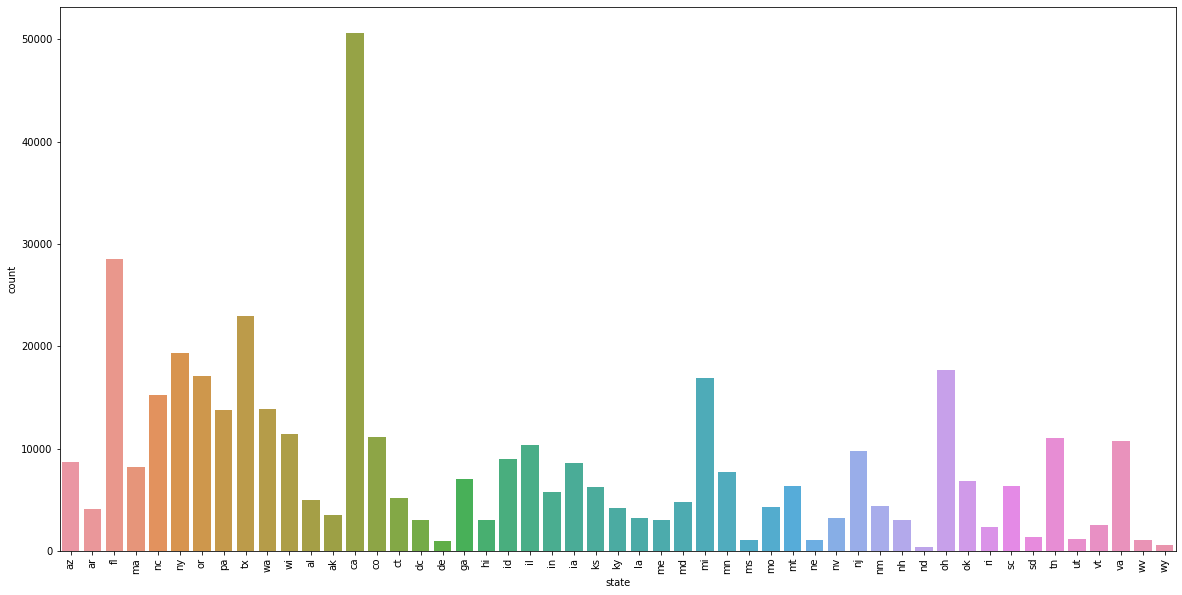

State yang paling banyak memposting iklan adalah CA


In [ ]:
#@title Visualisasi Jumlah Iklan di Setiap State

# Visualisasi banyak iklan yang diposting setiap state
plt.figure(figsize = (20, 10))
sns.countplot(x = 'state', data = data)
plt.xlabel("state")
plt.xticks(rotation = "vertical")
plt.show()
print("State yang paling banyak memposting iklan adalah CA")

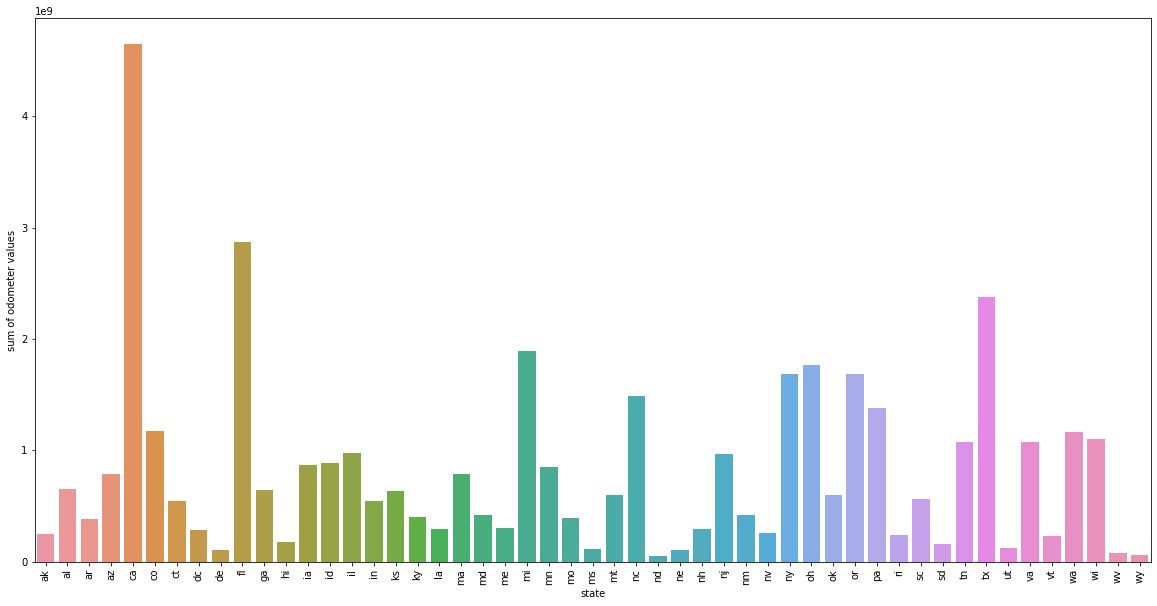

State yang paling sering menggunakan mobil adalah CA


In [ ]:
#@title Visualisasi Jumlah Penggunaan Mobil di Setiap State

# Visualisasi jumlah nilai odometer untuk setiap state
# (Hint di soal disuruh pake year sama odometer, tapi menurutku odometer cukup)
state_odo = cleaned_data.loc[:, ['state', 'odometer']]
state_odo = state_odo.groupby('state', as_index = False).sum()

plt.figure(figsize = (20, 10))
sns.barplot(x = 'state', y = 'odometer', data = state_odo)
plt.xlabel("state")
plt.ylabel("sum of odometer values")
plt.xticks(rotation = "vertical")
plt.show()
print("State yang paling sering menggunakan mobil adalah CA")

In [ ]:
#@title TODO: Visualisasi kendalaan paling populer di setiap `state`
print("Jenis kendaraan paling populer dikelompokkan berdasarkan state")
temp_data = cleaned_data.copy()
list_need = ["manufacturer", "model", "fuel", "transmission", "drive", "size", "type", "paint_color", "state"]
temp_data = temp_data.loc[:, list_need]
a = cleaned_data["state"].unique()

list_need = list_need[0:-1]
temp_dict = {}
for i in list_need:
  temp_dict[i] = []

for i in a:
  b = cleaned_data.loc[cleaned_data["state"] == i, list_need]
  for j in list_need:
    temp_dict[j].append(b[j].describe()["top"])
c = pd.DataFrame(temp_dict, index=a)

Jenis kendaraan paling populer dikelompokkan berdasarkan state


In [ ]:
data['type'].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

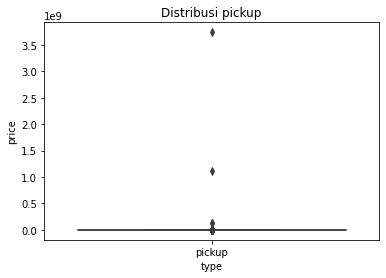

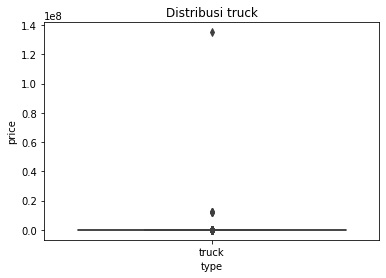

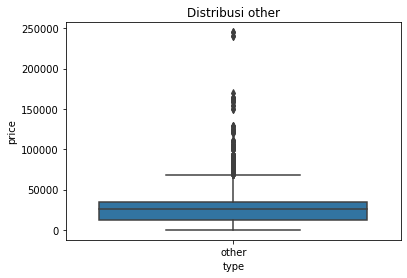

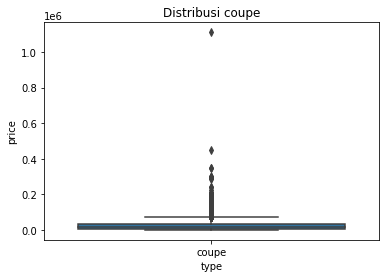

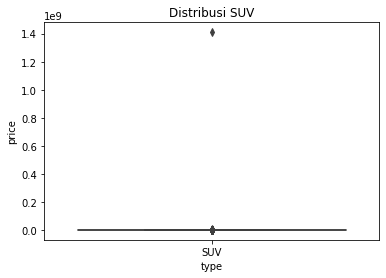

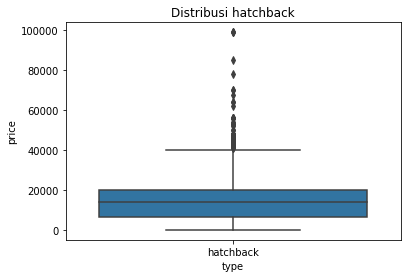

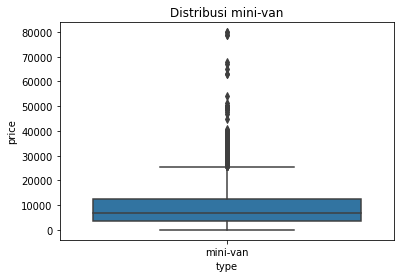

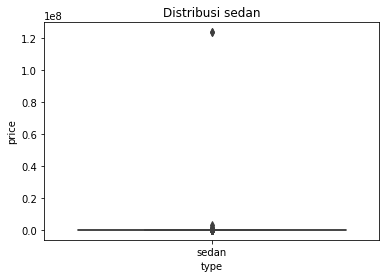

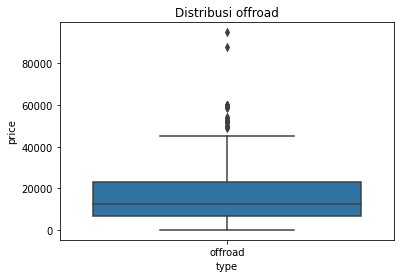

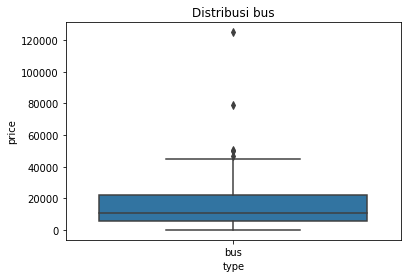

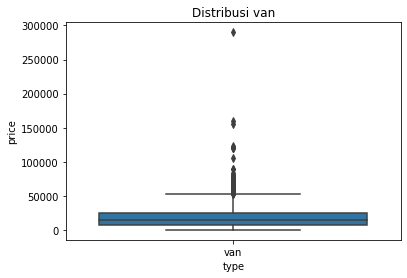

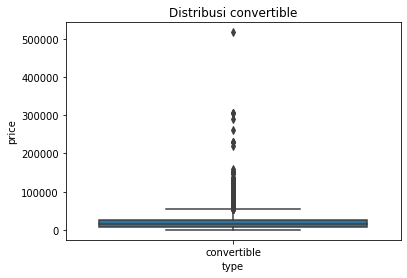

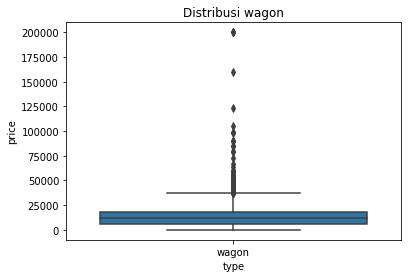

In [ ]:
#@title Distribusi persebaran harga (`price`) masing-masing tipe mobil (`type`)  

temp = data.copy()
lst_kendaraan = ['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon']
for kendaraan in lst_kendaraan:
  temp = data.loc[data['type'] == kendaraan, ['type', 'price']]
  plt.title("Distribusi " + str(kendaraan))
  sns.boxplot(x="type", y="price", data=temp)
  plt.show()
# clean_outlier(temp)

In [ ]:
temp = data.loc[data['type'] == "sedan"]
temp = temp.loc[temp['price'] > 1.5 * 10**6]
# temp["image_url"]
temp
# sns.boxplot(x="type", y="price", data=temp)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
68935,7302895209,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,2000000,2002.0,saturn,l-series l200 4dr sedan,good,4 cylinders,gas,164290.0,clean,automatic,NaN,fwd,mid-size,sedan,green,https://images.craigslist.org/00y0y_hw8QSdnerF...,No longer need runs and drives great. This ca...,NaN,ca,34.236498,-119.039074,2021-04-06T16:40:31-0700
137807,7314339777,https://spokane.craigslist.org/cto/d/spokane-1...,spokane / coeur d'alene,https://spokane.craigslist.org,123456789,1999.0,buick,regal,like new,6 cylinders,gas,96000.0,clean,automatic,NaN,fwd,full-size,sedan,white,https://images.craigslist.org/00A0A_hk9qOBaNnN...,This supercharged regal is no longer charged s...,NaN,id,47.695200,-117.365800,2021-04-29T08:48:15-0700
193736,7315524207,https://annarbor.craigslist.org/ctd/d/bowling-...,ann arbor,https://annarbor.craigslist.org,123456789,2015.0,chevrolet,cruze,like new,NaN,gas,64181.0,clean,automatic,1G1PC5SB0F7246637,fwd,compact,sedan,red,https://images.craigslist.org/00E0E_4p2RpUAHok...,PLEASE CALL FOR PRICING ON THE LOT AND FOR S...,NaN,mi,41.381500,-83.650700,2021-05-01T17:44:14-0400
327938,7314563134,https://altoona.craigslist.org/cto/d/revloc-bu...,altoona-johnstown,https://altoona.craigslist.org,3226714,2002.0,NaN,any and all,fair,8 cylinders,diesel,1234.0,clean,manual,NaN,4wd,mid-size,sedan,blue,https://images.craigslist.org/00B0B_heEI8cTCHX...,Buying Junk/Unwanted/Crashed Vehicles Cars-tru...,NaN,pa,40.480100,-78.726300,2021-04-29T18:24:17-0400


## Split data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
p_data1 = data.drop(columns = ['county'], inplace = False)
X = p_data1.drop('price',axis=1)
Y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [ ]:
y_test.to_csv("testing_label.csv", sep='\t')
X_test.to_csv("testing_set.csv", sep='\t')
!mv testing_label.csv "/content/gdrive/MyDrive/TK KASDD/prediksi_harga1"
!mv testing_set.csv "/content/gdrive/MyDrive/TK KASDD/prediksi_harga1"

mv: cannot move 'testing_label.csv' to '/content/gdrive/MyDrive/TK KASDD/prediksi_harga1': No such file or directory
mv: cannot move 'testing_set.csv' to '/content/gdrive/MyDrive/TK KASDD/prediksi_harga1': No such file or directory


In [ ]:
X_train1 = pd.concat([X_train, y_train], axis=1)

## Preprocessing Prediksi Harga 1

Atribut yang digunakan:

1. Type
1. Odometer
1. year
1. manufacturer
1. model
1. fuel
1. title_status
1. transmission

Apa yang di-preproses?

- Row dengan missing value atribut year dihilangkan
- Missing value di atribut lain diganti dengan mode atau mean
- Semua row dengan outlier dihilangkan

In [ ]:
# lst_kick = ["size", "cylinders", "condition", "VIN", "drive", "paint_color"]
lst_add = ["type", "odometer", "year", "manufacturer", "model", "fuel", "title_status", "transmission", 
           "price"]
X_train1 = X_train1.loc[:, lst_add]

In [ ]:
X_train1 = X_train1[X_train1["year"].notna()]
# print(data.shape)
print(X_train1.shape)

(297954, 9)


In [ ]:
# categoric_cleaning_fillna_mode(X_train1)
categoric_cleaning_fillna_mode(X_train1)
numeric_cleaning_fillna_mean(X_train1)
cek_null(X_train1)
# X_train2 = pd.concat([X_train1_cat, X_train1_num])

          Total   Percent
odometer   3053  0.010247


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_train1 = clean_outlier(X_train1)

In [ ]:
y_train_res = X_train1['price']
X_train_res = X_train1.drop('price',axis=1)
y_train_res.to_csv("training_label.csv", sep='\t')
X_train_res.to_csv("training_set.csv", sep='\t')

In [ ]:
if False:
  !mv training_label.csv "/content/gdrive/MyDrive/TK KASDD/prediksi_harga1"
  !mv training_set.csv "/content/gdrive/MyDrive/TK KASDD/prediksi_harga1"

In [ ]:
X_train_res

,type,odometer,year,manufacturer,model,fuel,title_status,transmission
392439,sedan,113300.0,2010.0,nissan,altima 2.5 s,gas,clean,automatic
190315,sedan,114090.0,2012.0,honda,civic sedan,gas,clean,automatic
387572,sedan,111000.0,2009.0,dodge,charger,gas,clean,automatic
300239,sedan,100000.0,2014.0,jeep,grand cherokee overland,gas,clean,manual
155539,truck,50000.0,2009.0,chevrolet,silverado 2500hd,gas,clean,automatic
...,...,...,...,...,...,...,...,...
192476,sedan,111000.0,2009.0,dodge,charger,gas,clean,automatic
17730,sedan,70908.0,2015.0,lexus,rc 350,gas,clean,automatic
28030,SUV,162652.0,2006.0,ford,freestyle limited,gas,clean,automatic
277869,SUV,12971.0,2017.0,subaru,outback,gas,clean,automatic


In [ ]:
cek_null(pd.DataFrame(X_test))

              Total   Percent
size          91968  0.718141
cylinders     53345  0.416550
condition     52155  0.407257
VIN           48292  0.377093
drive         39326  0.307081
paint_color   38977  0.304356
type          27877  0.217680
manufacturer   5146  0.040183
title_status   2463  0.019233
lat            1943  0.015172
long           1943  0.015172
model          1578  0.012322
odometer       1297  0.010128
fuel            913  0.007129
transmission    751  0.005864
year            343  0.002678
posting_date     19  0.000148
image_url        19  0.000148
description      19  0.000148


## Preprocess Prediksi Iklan Palsu 1

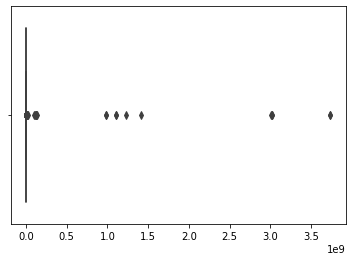

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,426880,426880,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426812,426810,426880,426812
unique,426880,404,413,42,29667,6,8,5,6,3,118264,3,4,13,12,241899,360911,51,381536
top,https://desmoines.craigslist.org/ctd/d/des-moi...,columbus,https://spokane.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-04-23T22:13:05-0400
freq,1,3608,2988,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,7357,231,50614,12



Lihat persentase missing values
               Total   Percent
county        426880  1.000000
size          306361  0.717675
cylinders     177678  0.416225
condition     174104  0.407852
VIN           161042  0.377254
drive         130567  0.305863
paint_color   130203  0.305011
type           92858  0.217527
manufacturer   17646  0.041337
title_status    8242  0.019308
long            6549  0.015342
lat             6549  0.015342
model           5277  0.012362
odometer        4400  0.010307
fuel            3013  0.007058
transmission    2556  0.005988
year            1205  0.002823
description       70  0.000164
posting_date      68  0.000159
image_url         68  0.000159


None


Hitung duplikasi data
Jumlah duplikasi data: 0

Hitung outlier


,total outlier
id,44.0
price,8177.0
year,15896.0
odometer,4385.0
county,0.0
lat,6413.0
long,195.0


In [ ]:
a = data["price"].to_frame()
display(sns.boxplot(x=a.to_numpy()))
plt.show()
b = clean_outlier(a)
display(sns.boxplot(x=b.to_numpy()))

In [ ]:
print("Atribut drive dan cylinders terlihat numerik")
print()
print("Atribut drive")
display(cat_attr['drive'].dropna())
print()
print("Atribute cylinders")
display(cat_attr['cylinders'].dropna())

Atribut drive dan cylinders terlihat numerik

Atribut drive


31        rwd
32        4wd
33        4wd
34        4wd
35        4wd
         ... 
426874    rwd
426875    fwd
426876    fwd
426878    fwd
426879    rwd
Name: drive, Length: 296313, dtype: object


Atribute cylinders


27        8 cylinders
28        8 cylinders
29        8 cylinders
30        8 cylinders
31        6 cylinders
             ...     
426866    8 cylinders
426868    6 cylinders
426874    6 cylinders
426875    6 cylinders
426878    6 cylinders
Name: cylinders, Length: 249202, dtype: object

#### Identifikasi masalah dataset

1. Atribut `cylinders` disebut atribut kategorik tetapi sebenarnya mirip dengan atribut numerik.
1. Atribut `county` semuanya null values.
1. Atribut `size` hingga `paint color` memiliki banyak missing values.
1. Banyak outlier pada atribut numerik, hal ini perlu di visualisasi persebarannya.

In [ ]:
cleaned_data = data.copy()
# Drop kolom county
cleaned_data.drop(columns = ['county'], inplace = True)

#### Visualisasi banyak iklan yang diposting setiap state

State yang paling banyak memposting iklan adalah CA


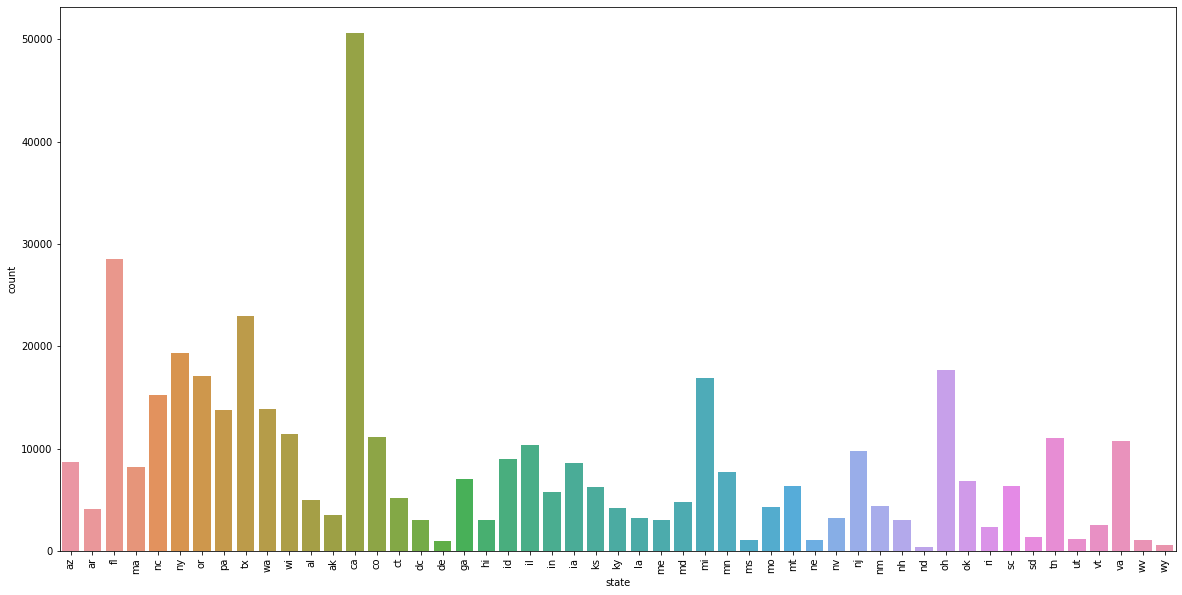

In [ ]:
print("State yang paling banyak memposting iklan adalah CA")
plt.figure(figsize = (20, 10))
sns.countplot(x = 'state', data = data)
plt.xlabel("state")
plt.xticks(rotation = "vertical")
plt.show()

#### Visualisasi jumlah nilai odometer untuk setiap state

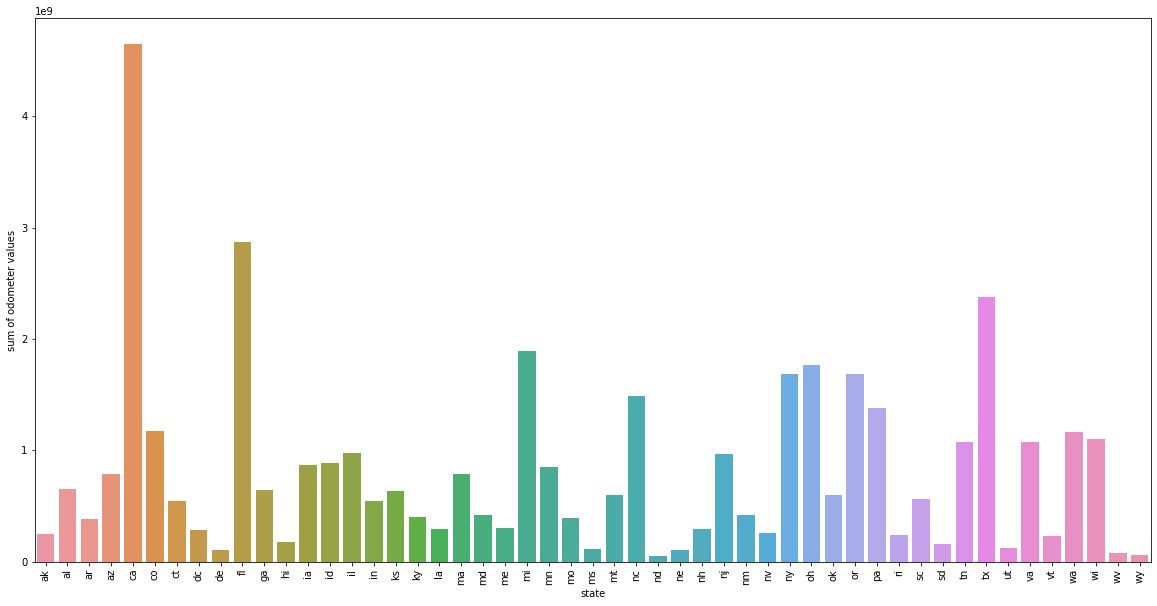

State yang paling sering menggunakan mobil adalah CA


In [ ]:
# (Hint di soal disuruh pake year sama odometer, tapi menurutku odometer cukup)
state_odo = cleaned_data.loc[:, ['state', 'odometer']]
state_odo = state_odo.groupby('state', as_index = False).sum()

plt.figure(figsize = (20, 10))
sns.barplot(x = 'state', y = 'odometer', data = state_odo)
plt.xlabel("state")
plt.ylabel("sum of odometer values")
plt.xticks(rotation = "vertical")
plt.show()
print("State yang paling sering menggunakan mobil adalah CA")

#### Jenis kendaraan paling populer untuk setiap state

Berdasarkan: manufacturer, model, fuel, transmission, drive, size, type, dan paint_color.

##### Berdasarkan manufacturer

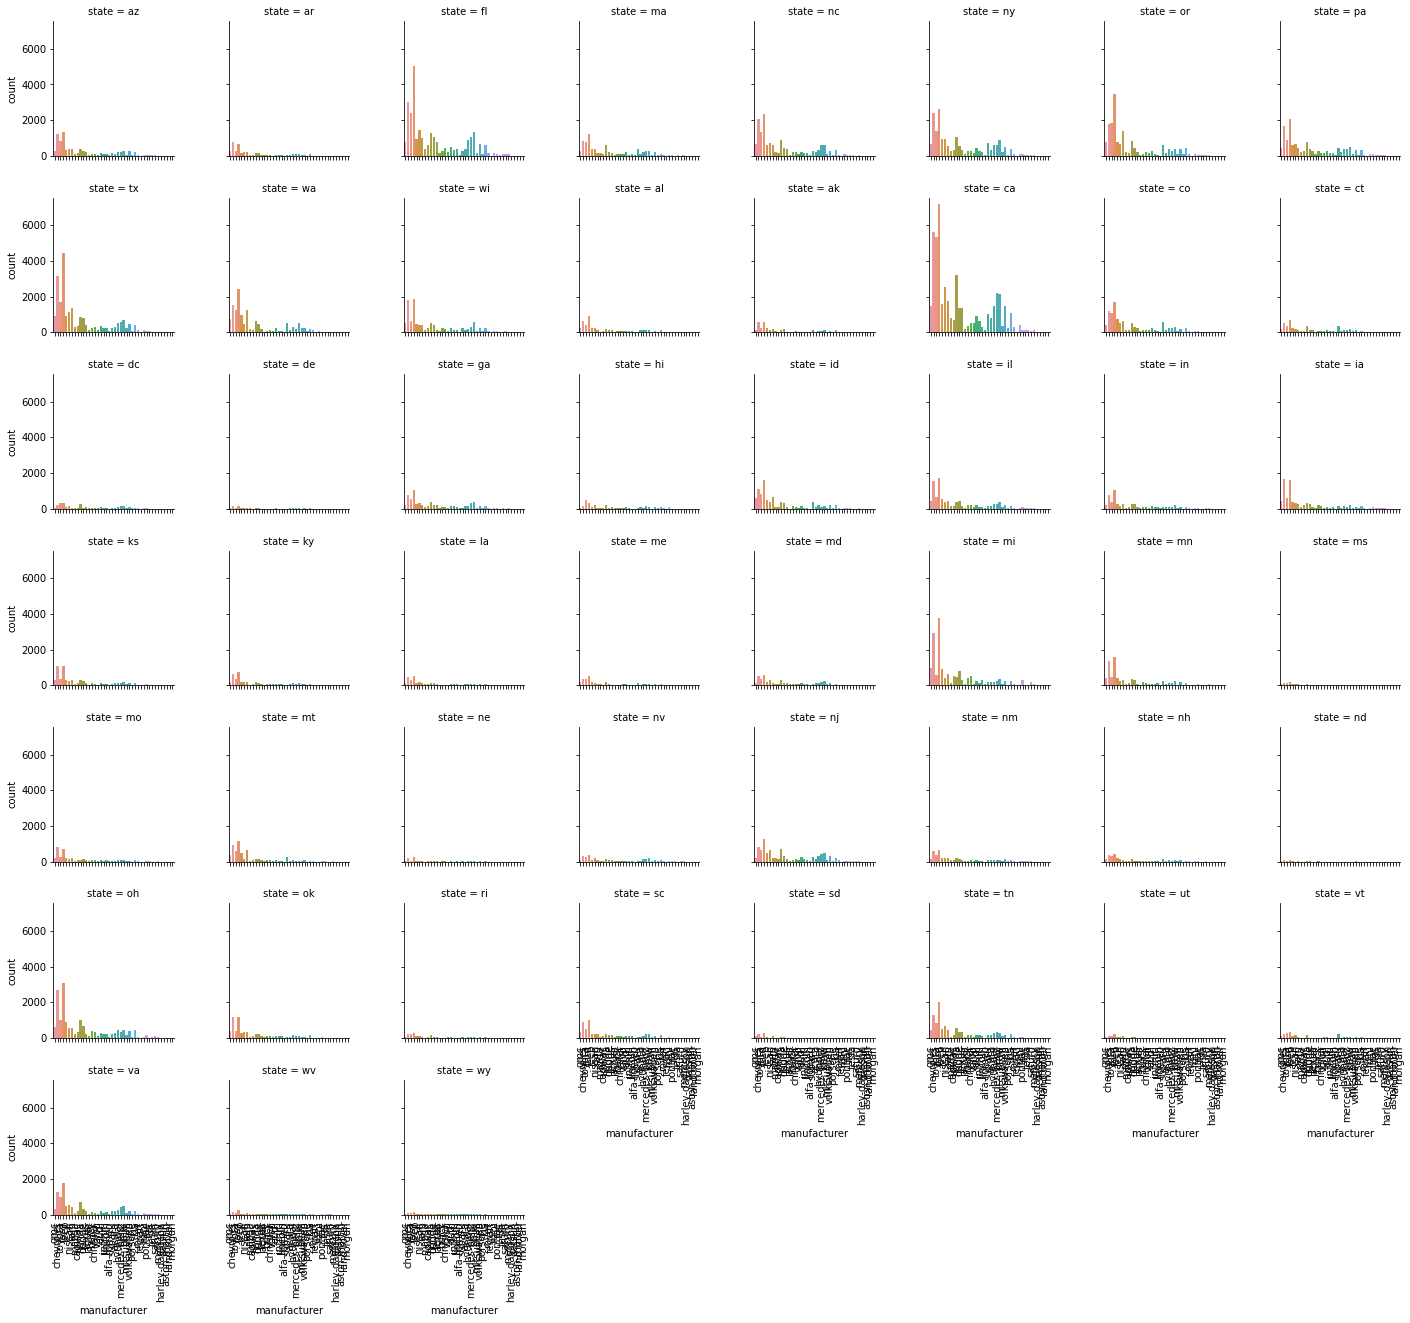

In [ ]:
state_type = cleaned_data.loc[:, ['state', 'manufacturer']]
grid = sns.catplot(x = 'manufacturer', col = 'state', col_wrap = 8, data = state_type, kind = 'count', height = 2.5)
grid.set_xticklabels(rotation = "vertical")
plt.show()

##### Berdasarkan model

In [ ]:
# state_type = cleaned_data.loc[:, ['state', 'model']]
# grid = sns.catplot(x = 'model', col = 'state', col_wrap = 8, data = state_type, kind = 'count', height = 2.5)
# grid.set_xticklabels(rotation = "vertical")
# plt.show()

##### Berdasarkan fuel

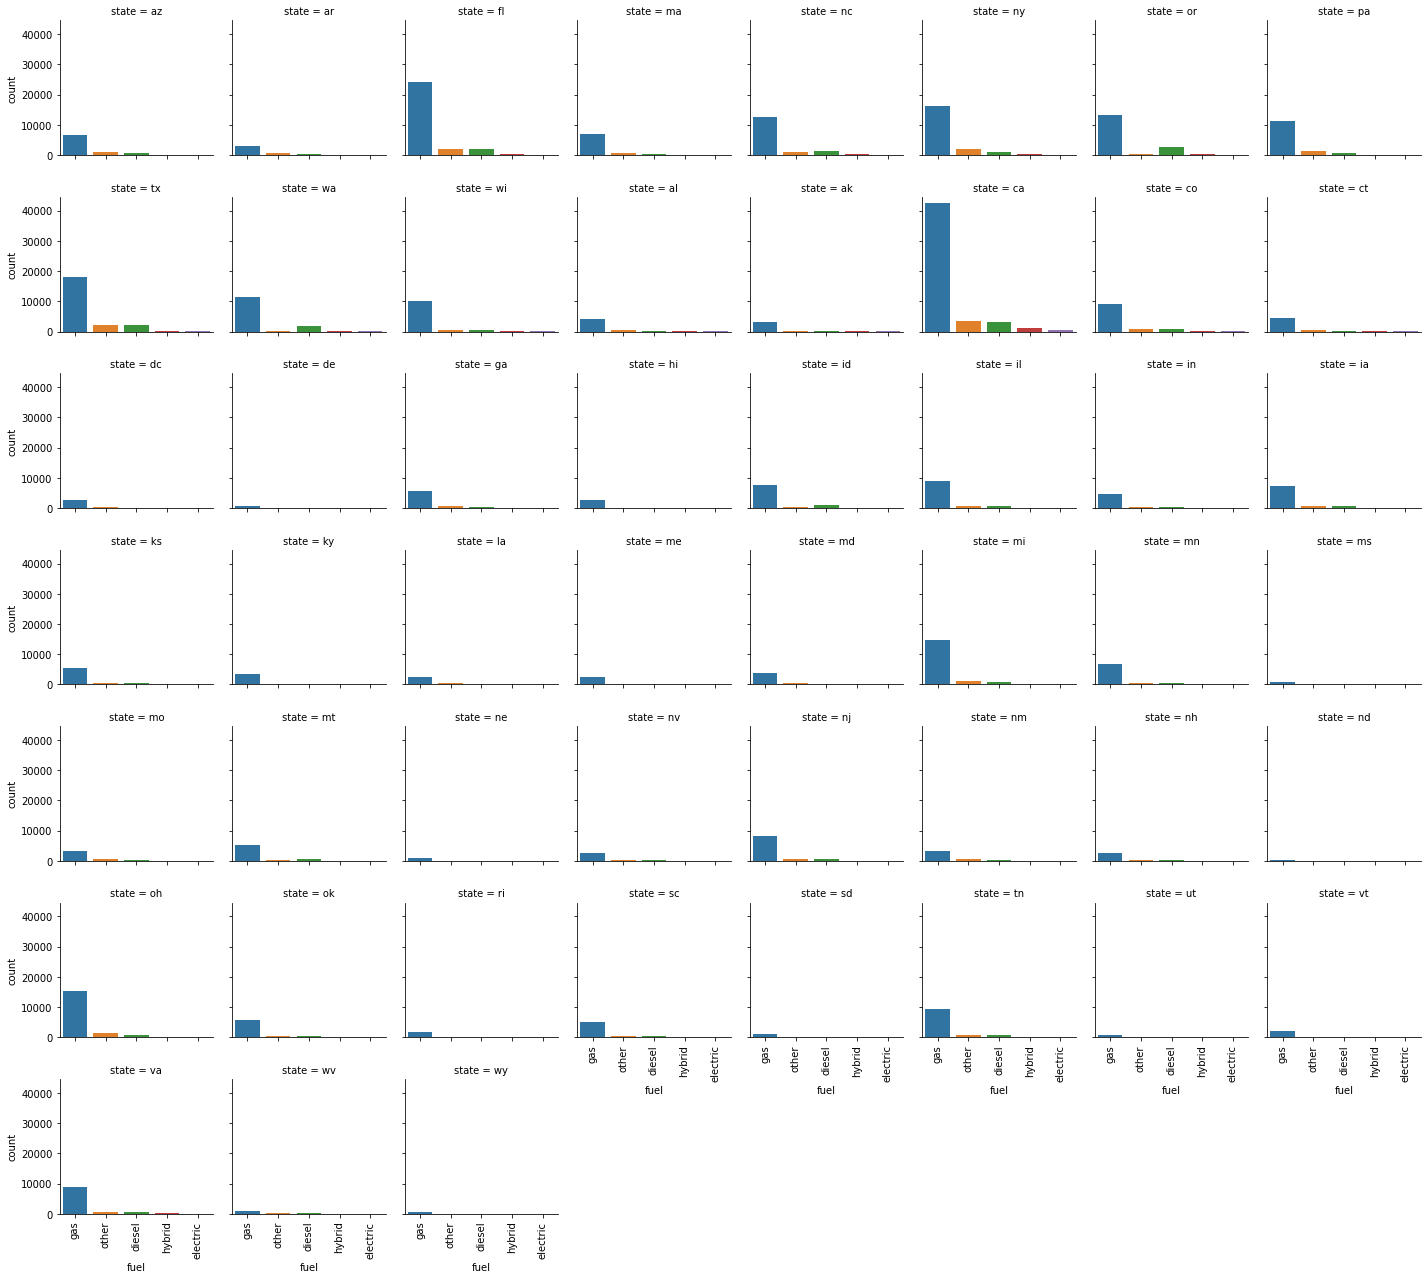

In [ ]:
state_type = cleaned_data.loc[:, ['state', 'fuel']]
grid = sns.catplot(x = 'fuel', col = 'state', col_wrap = 8, data = state_type, kind = 'count', height = 2.5)
grid.set_xticklabels(rotation = "vertical")
plt.show()

##### Berdasarkan transmission

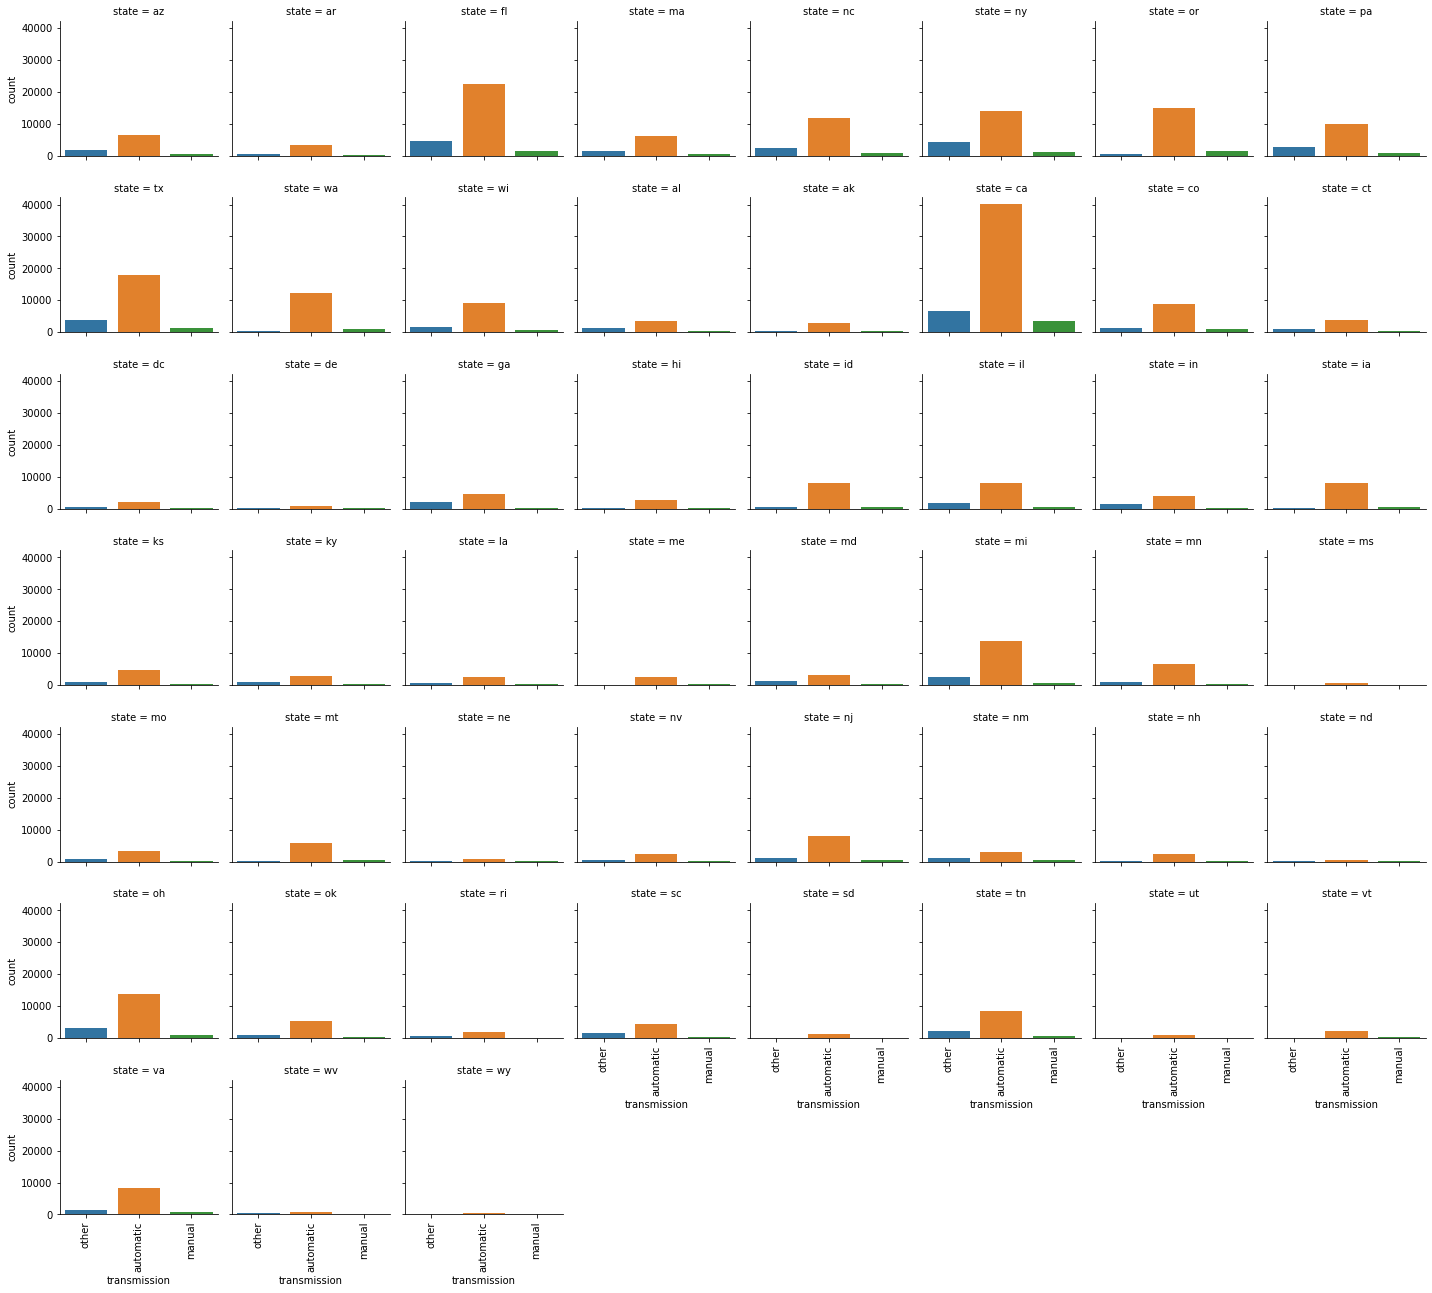

In [ ]:
state_type = cleaned_data.loc[:, ['state', 'transmission']]
grid = sns.catplot(x = 'transmission', col = 'state', col_wrap = 8, data = state_type, kind = 'count', height = 2.5)
grid.set_xticklabels(rotation = "vertical")
plt.show()

##### Berdasarkan drive

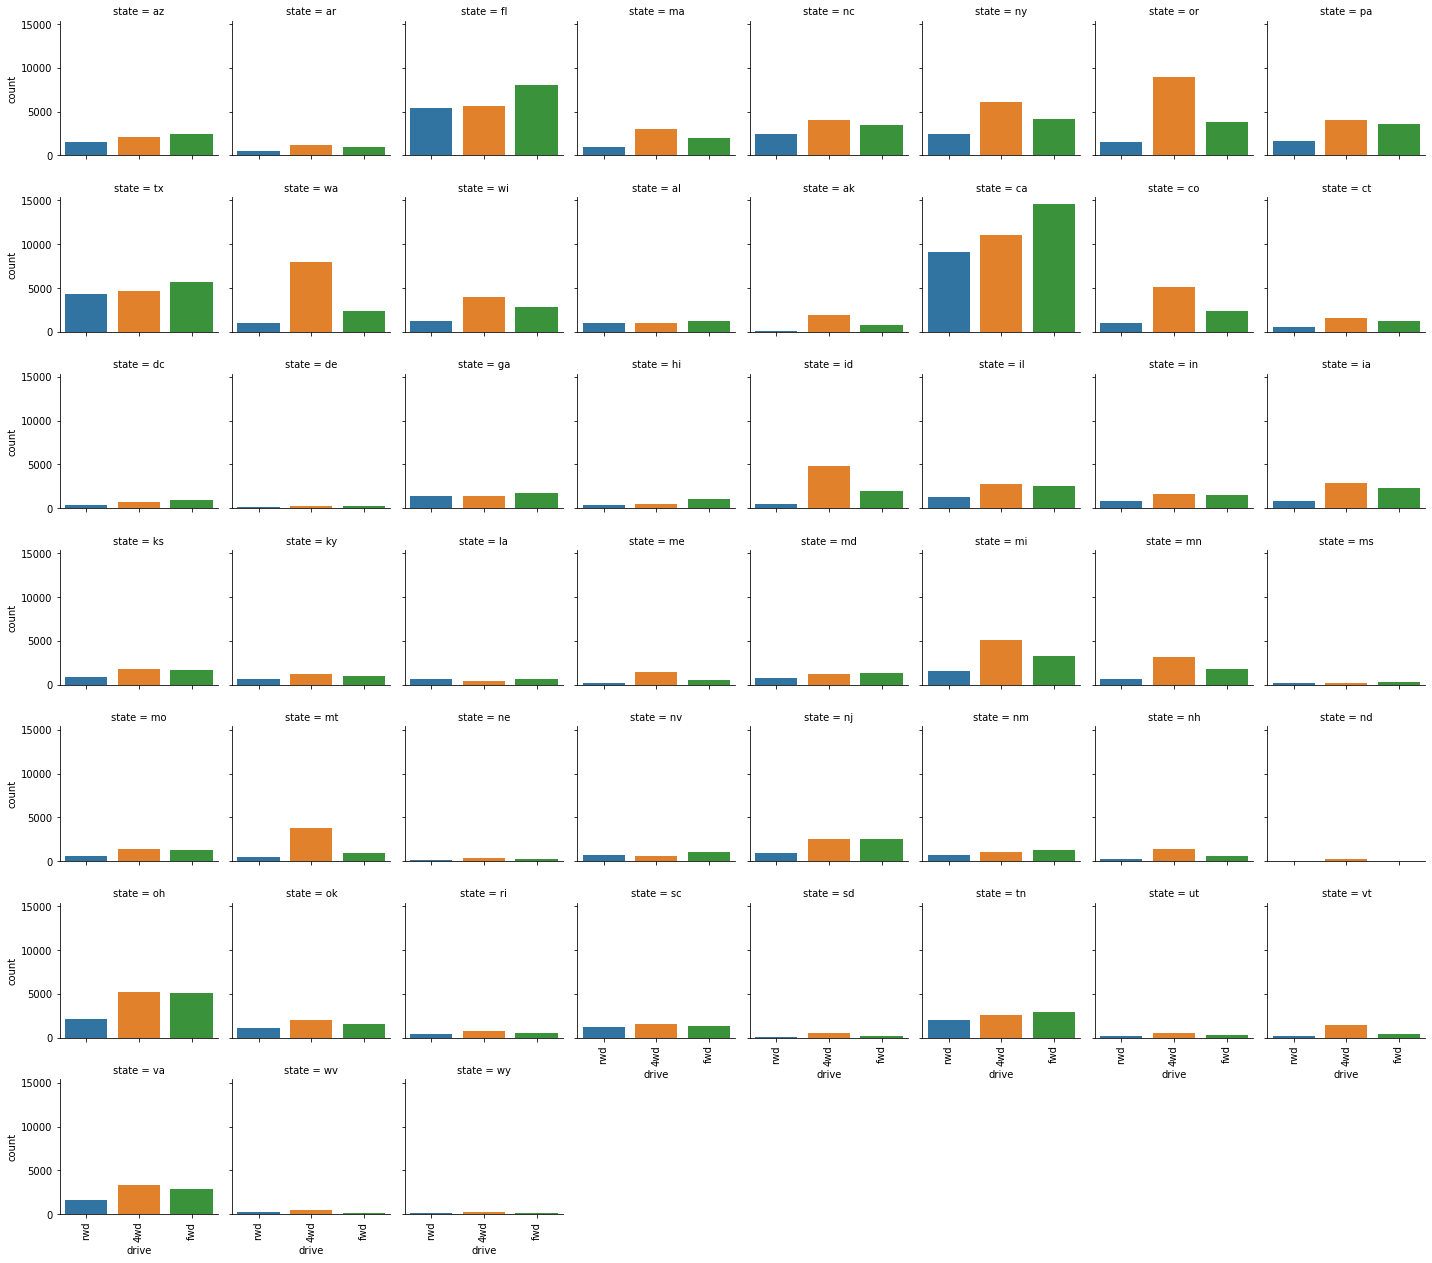

In [ ]:
state_type = cleaned_data.loc[:, ['state', 'drive']]
grid = sns.catplot(x = 'drive', col = 'state', col_wrap = 8, data = state_type, kind = 'count', height = 2.5)
grid.set_xticklabels(rotation = "vertical")
plt.show()

##### Berdasarkan size

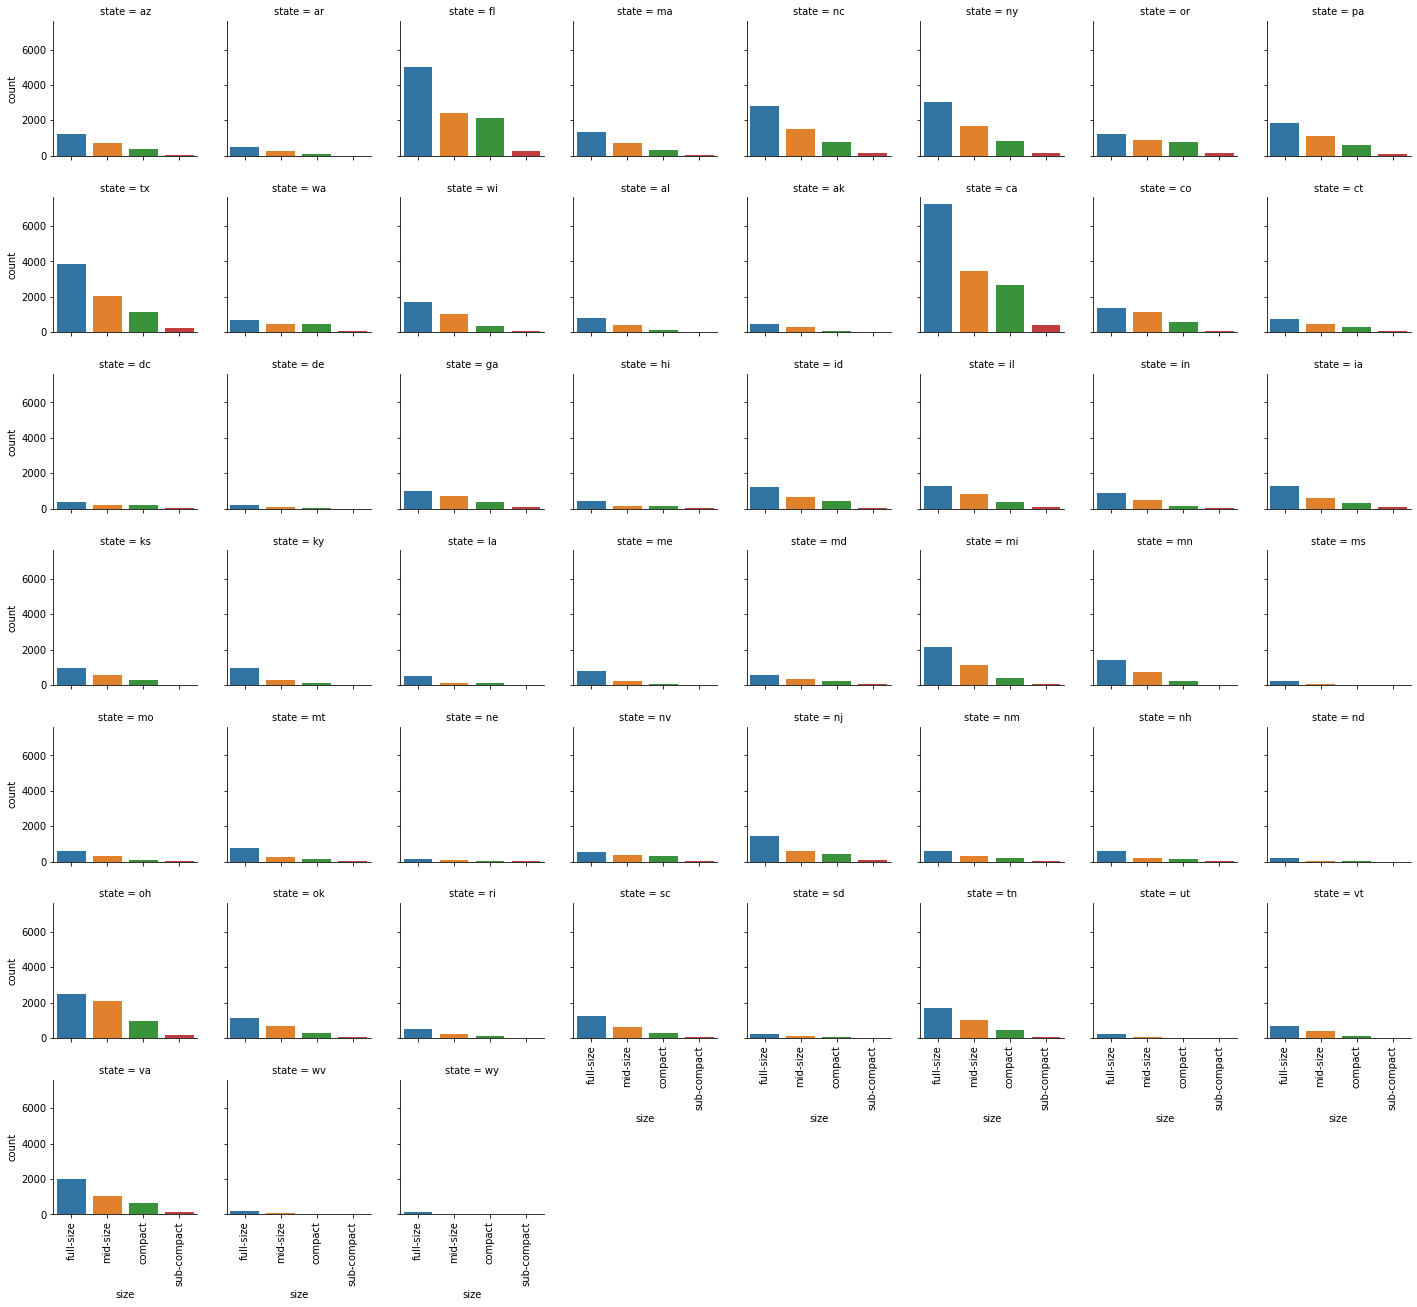

In [ ]:
state_type = cleaned_data.loc[:, ['state', 'size']]
grid = sns.catplot(x = 'size', col = 'state', col_wrap = 8, data = state_type, kind = 'count', height = 2.5)
grid.set_xticklabels(rotation = "vertical")
plt.show()

##### Berdasarkan type

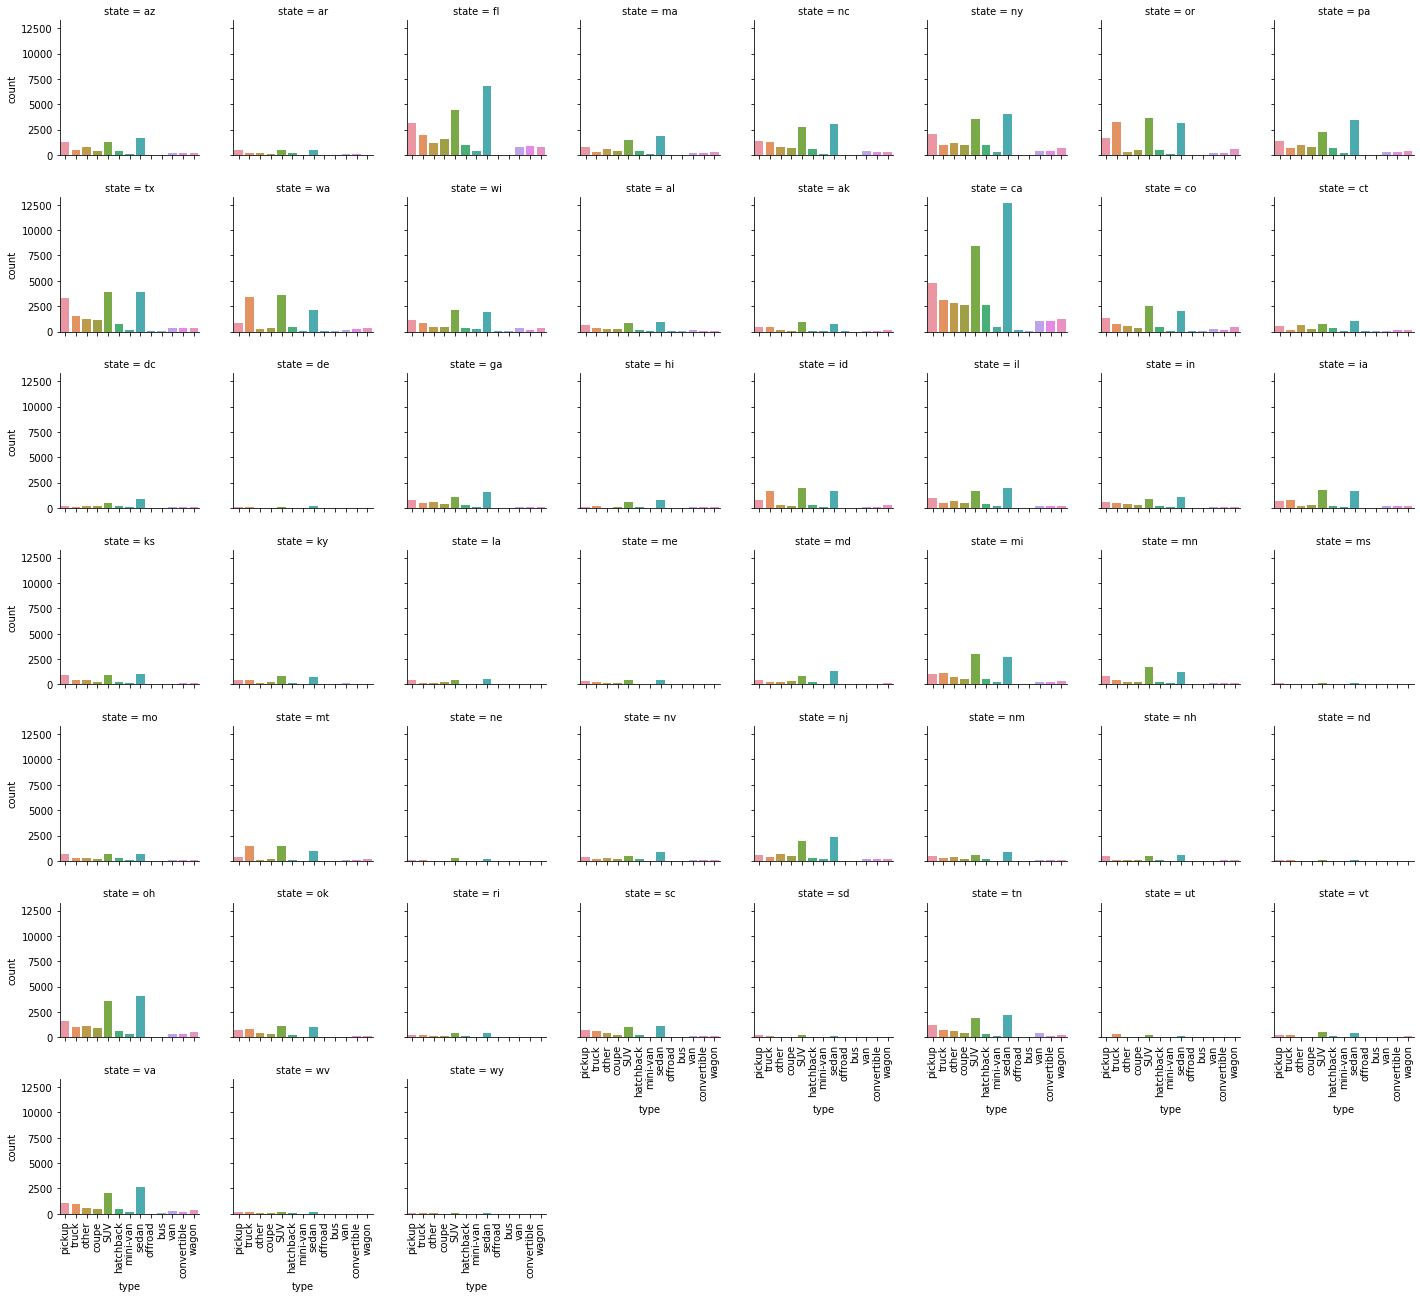

In [ ]:
state_type = cleaned_data.loc[:, ['state', 'type']]
grid = sns.catplot(x = 'type', col = 'state', col_wrap = 8, data = state_type, kind = 'count', height = 2.5)
grid.set_xticklabels(rotation = "vertical")
plt.show()

##### Berdasarkan paint_color

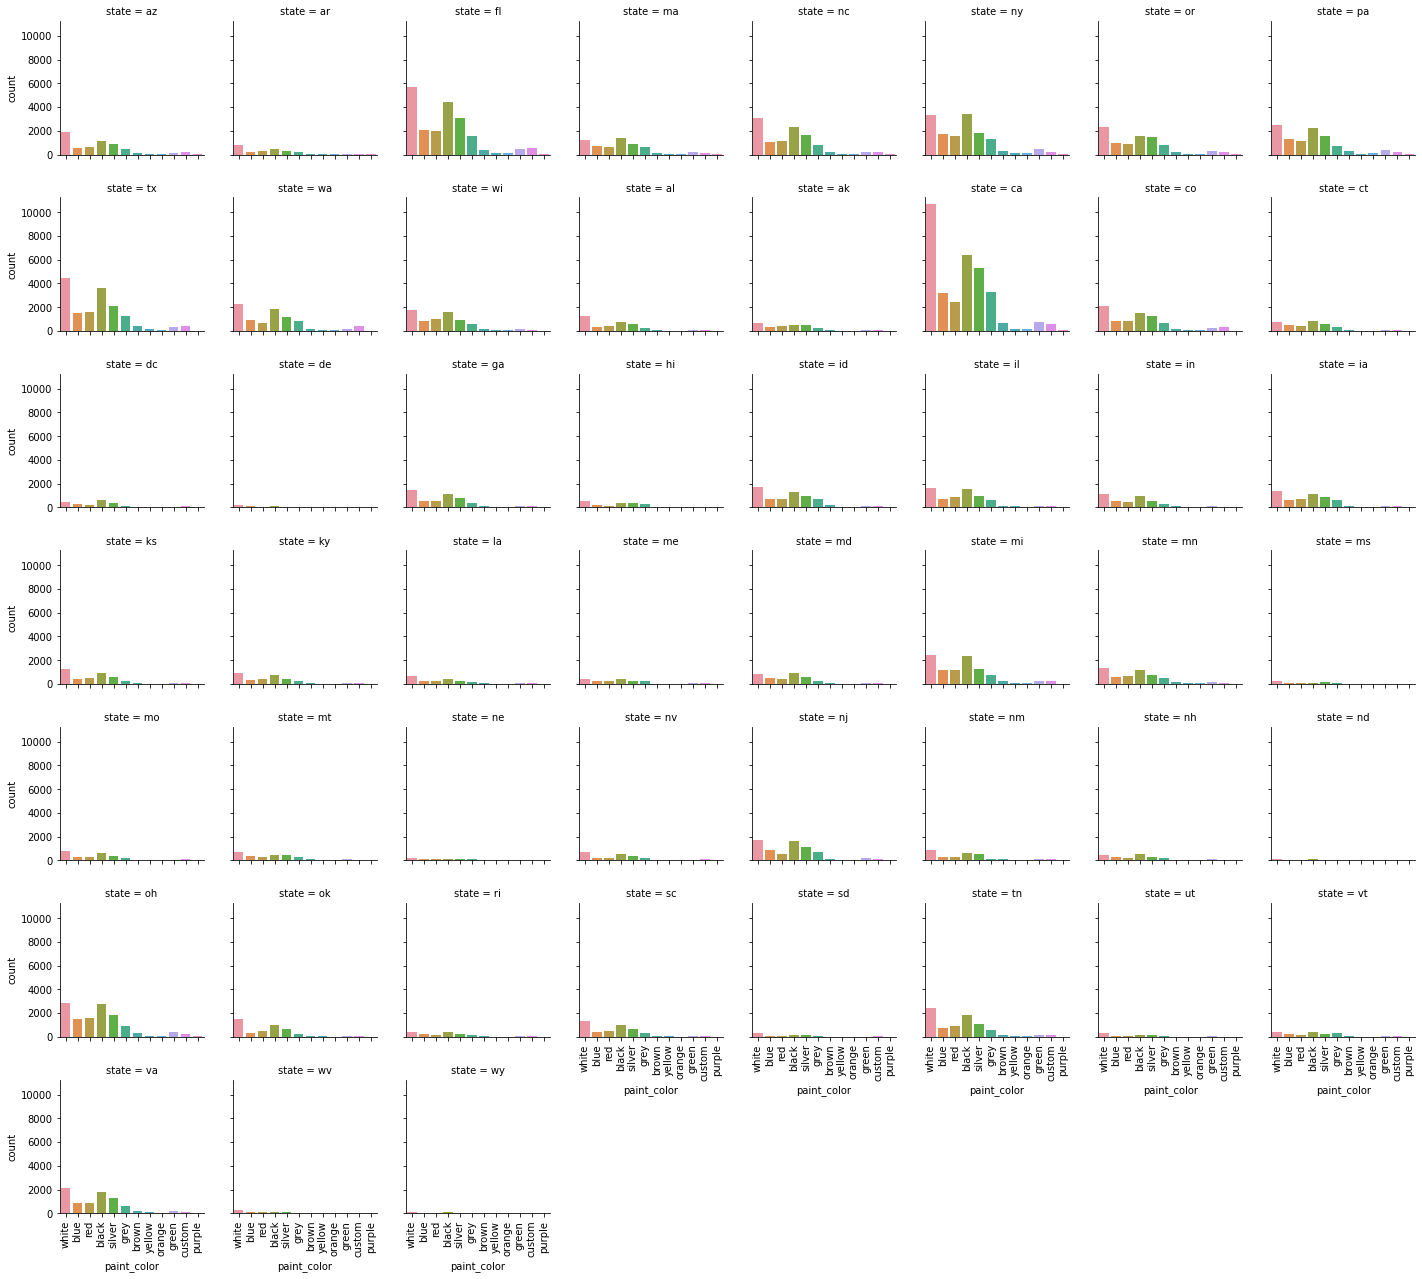

In [ ]:
state_type = cleaned_data.loc[:, ['state', 'paint_color']]
grid = sns.catplot(x = 'paint_color', col = 'state', col_wrap = 8, data = state_type, kind = 'count', height = 2.5)
grid.set_xticklabels(rotation = "vertical")
plt.show()

# Download data

In [ ]:
download_from_gdrive("1-4z_qdWGSiC7yP11t6M6PFfgbmZ8HRH4")
download_from_gdrive("1-3hx6pNgPLF_Fbc4TKdKcjfwaYS1V0-U")
download_from_gdrive("1--TKsa1MBPO-Jp8jXMLa8WxnpC3kLaij")
download_from_gdrive("1cjyHEOp_aHH0eRjFozzcm4Daf0ZYxyWR")

In [ ]:
_X_train = pd.read_csv("training_set.csv")
_y_train = pd.read_csv("training_label.csv")
_X_test = pd.read_csv("testing_set.csv")
_y_test = pd.read_csv("testing_label.csv")

In [ ]:
print(_X_train.shape)
print(_y_train.shape)
print(_X_test.shape)
print(_y_test.shape)
display(_X_train['type'].value_counts()/_X_test['type'].value_counts())

(278563, 8)
(278563, 1)
(128064, 24)
(128064, 1)


SUV            2.256197
bus            2.019355
convertible    1.856958
coupe          1.998261
hatchback      2.292394
mini-van       2.364598
offroad        1.687500
other          2.237443
pickup         2.114044
sedan          4.482936
truck          2.070571
van            2.292121
wagon          2.314572
Name: type, dtype: float64

# Train and Test 13 Models

# Train and Test 1 Model

## Train and test

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
cols = ['fuel', 'transmission', 'title_status']
one_hot_cols = pd.get_dummies(_X_train.loc[:, cols], drop_first = True)

cols = ['type', 'manufacturer']
# cols = ['type', 'manufacturer', 'title_status', 'fuel', 'transmission']
ordinal_cols = _X_train.loc[:, cols]
enc = OrdinalEncoder()
ordinal_cols = enc.fit_transform(ordinal_cols)

X_train = _X_train.loc[:, ['odometer', 'year']]
scaler = MinMaxScaler()
# scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = np.hstack([X_train, ordinal_cols, one_hot_cols])
# X_train = np.hstack([X_train, one_hot_cols])

In [ ]:
y_train = _y_train.copy()
scaler = MinMaxScaler()
# scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)

In [ ]:
def clean_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  result = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
  return result

test_data = pd.concat([_X_test, _y_test], axis = 1)
test_data = clean_outlier(test_data)
_X_test = test_data.drop(columns = ['price'])
_y_test = test_data.loc[:, ['price']]

In [ ]:
def fill_mode(data, col):
  data[col].fillna(data[col].mode()[0], inplace = True)

def fill_mean(data, col):
  data[col].fillna(data[col].mean(), inplace = True)

cols = ['fuel', 'transmission', 'title_status']
one_hot_cols = pd.get_dummies(_X_test.loc[:, cols], drop_first = True)

cols = ['type', 'manufacturer']
# cols = ['type', 'manufacturer', 'title_status', 'fuel', 'transmission']
ordinal_cols = _X_test.loc[:, cols]
for col in cols:
  fill_mode(ordinal_cols, col)
enc = OrdinalEncoder()
ordinal_cols = enc.fit_transform(ordinal_cols)

cols = ['odometer', 'year']
X_test = _X_test.loc[:, cols]
for col in cols:
  fill_mean(X_test, col)
scaler = MinMaxScaler()
# scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_test = np.hstack([X_test, ordinal_cols, one_hot_cols])
# X_test = np.hstack([X_test, one_hot_cols])

In [ ]:
y_test = _y_test.copy()
scaler = MinMaxScaler()
# scaler = StandardScaler()
y_test = scaler.fit_transform(y_test)

In [ ]:
# display(_y_train.sort_values('price'))
# display(_y_test.sort_values('price'))

display(X_train.shape)
display(y_train.shape)
display(y_test.shape)
display(y_test.shape)

# sns.kdeplot(data = _y_train, x = "price")
# plt.show()
# sns.kdeplot(data = _y_test, x = "price")

(278563, 15)

(278563, 1)

(117929, 1)

(117929, 1)

In [ ]:
reg = MLPRegressor(activation = 'relu', learning_rate = 'invscaling')
# reg = LinearRegression()
# reg = Ridge()
# reg = Lasso()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



R^2: 0.4354360467588223
MAE: 0.12296151956444928
MSE: 0.029938986641395614
RMSE: 0.17302886071807677


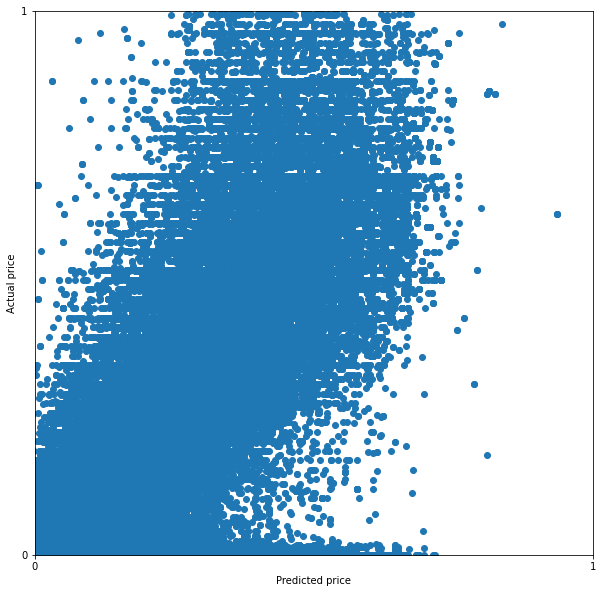

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R^2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize = (10, 10))
plt.scatter(y_pred, y_test)
plt.xlim(left = 0, right = 1)
plt.xticks([0, 1])
plt.ylim(bottom = 0, top = 1)
plt.yticks([0, 1])
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.show()